In [1]:
import os
import mlflow

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from iquaflow.datasets import DSWrapper
from iquaflow.experiments import ExperimentSetup, ExperimentInfo, ExperimentVisual
from iquaflow.experiments.task_execution import PythonScriptTaskExecution

from custom_iqf import (
    DSModifierResize,
    DSModifier_jpg,
    DSModifier_quant
    )

/opt/conda/envs/iqf/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  


In [6]:
experiment_info = ExperimentInfo("iq-dota-obb-use-case")

df = experiment_info.get_df(
    ds_params=['model','outformat','quality','bits','scaleperc'],
    metrics=['AR_test', 'mAP_test','Mb'],
    fields_to_float_lst = ['AR_test', 'mAP_test','Mb'],
    dropna=False
)

df = df[(df['ds_outformat'].notnull())]

df['compression'] = df['ds_quality']
for mod in ['ds_quality','ds_bits','ds_scaleperc']:
    df['compression'][df[mod].notnull()] = mod.replace('ds_','')
    
met1, met2, met3 = 'Mb', 'mAP_test', 'AR_test'

In [40]:
df.head()

,name,ds_model,ds_outformat,ds_quality,ds_bits,ds_scaleperc,AR_test,mAP_test,Mb,compression
1,train#quant5_modifier,rcnn,jpg,None,5,None,NaN,NaN,0.345978,bits
2,train#quant5_modifier_0,fcos,jpg,None,5,None,0.848227,0.6693,0.345978,bits
3,train#quant4_modifier,rcnn,jpg,None,4,None,0.795927,0.6459,0.378362,bits
4,train#quant4_modifier_0,fcos,jpg,None,4,None,0.855520,0.6662,0.378362,bits
5,train#quant3_modifier,rcnn,jpg,None,3,None,0.764747,0.6238,0.415748,bits


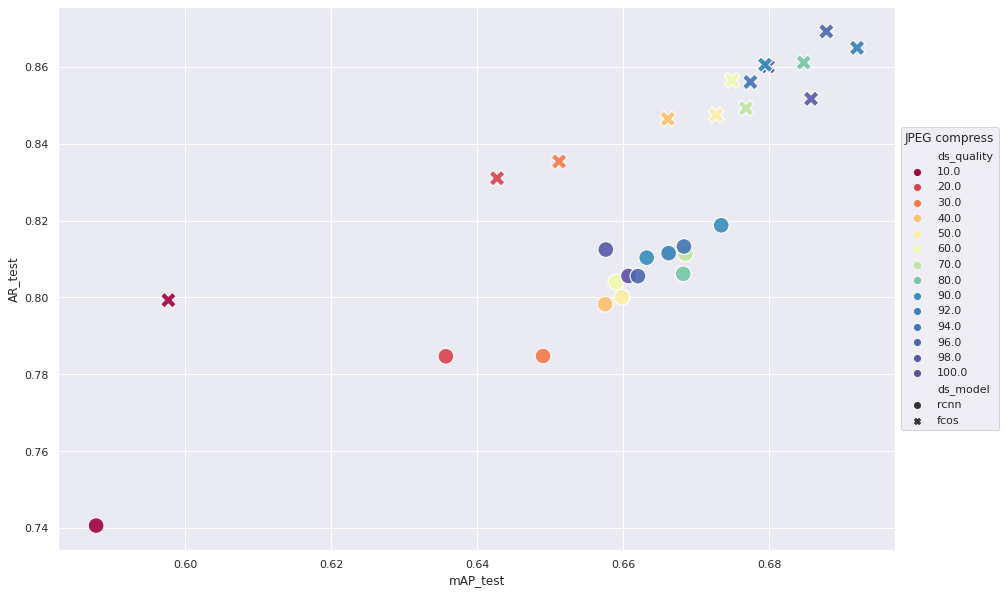

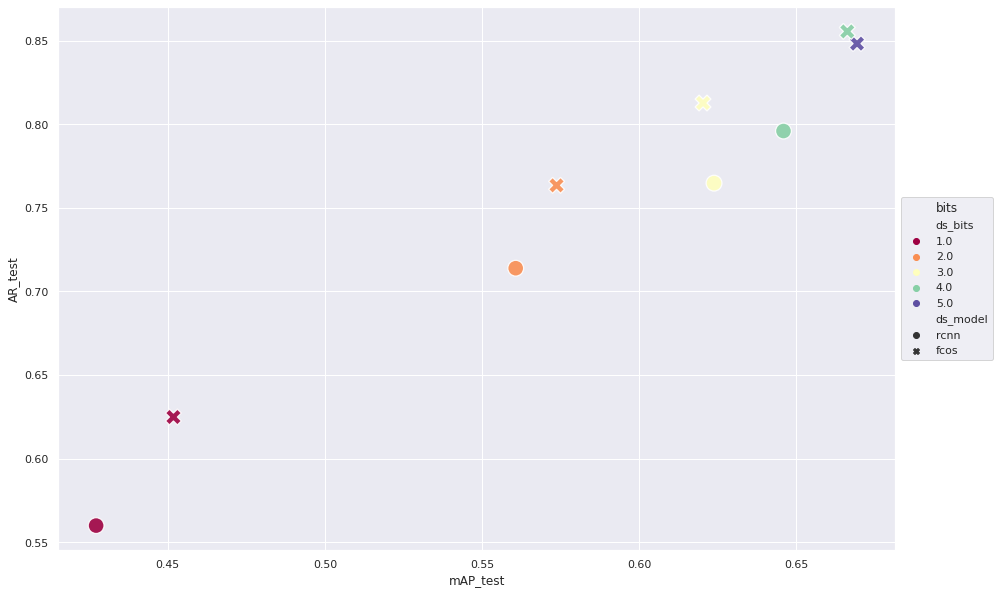

No handles with labels found to put in legend.


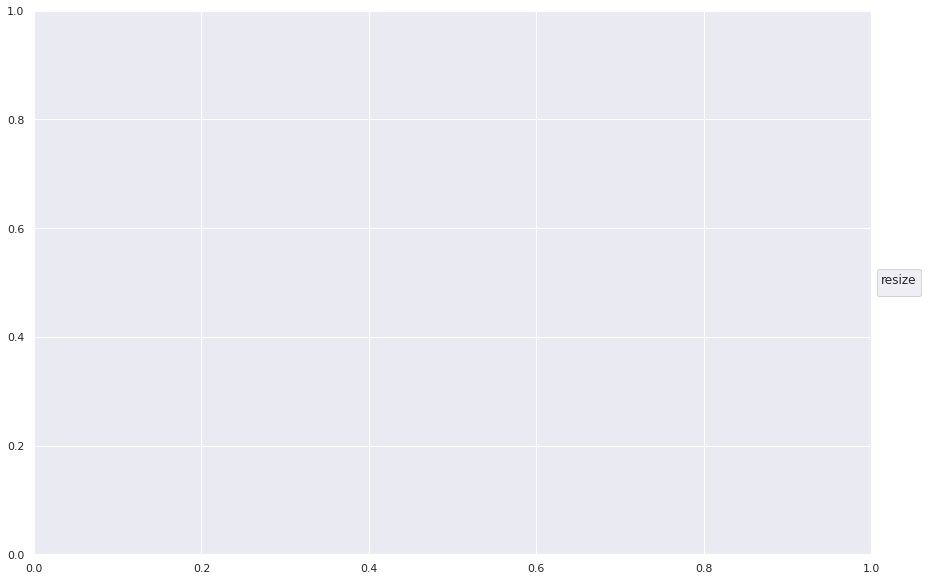

In [39]:
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)})

for title,mod,pal in zip(
    ['JPEG compress','bits','resize'],
    ['ds_quality','ds_bits','ds_scaleperc'],
    ['Reds','Greens','Blues']
    
):
    
    for dfq in [
        df[(df[mod].notnull()) & (df['ds_outformat']=='jpg')],
        # df[(df[mod].notnull()) & (df['ds_outformat']=='jpg') & (df['Mb']>0.16) & (df['mAP_test']>0.35) ]
    ]:
        
        dfq[mod] = dfq[mod].astype(int)

        handle = sns.scatterplot(
            data=dfq, x=met2, y=met3,
            hue=mod,
            legend='full',
            palette="Spectral",
            style=dfq['ds_model'],
            # alpha=0.5,
            # marker='X',
            s=250
        )

        leg =  handle.legend(title=title, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
        # leg = plot._legend
        for t in leg.texts:
            t.set_text(float(t.get_text()) if t.get_text().isdigit() else t.get_text())

        plt.show()

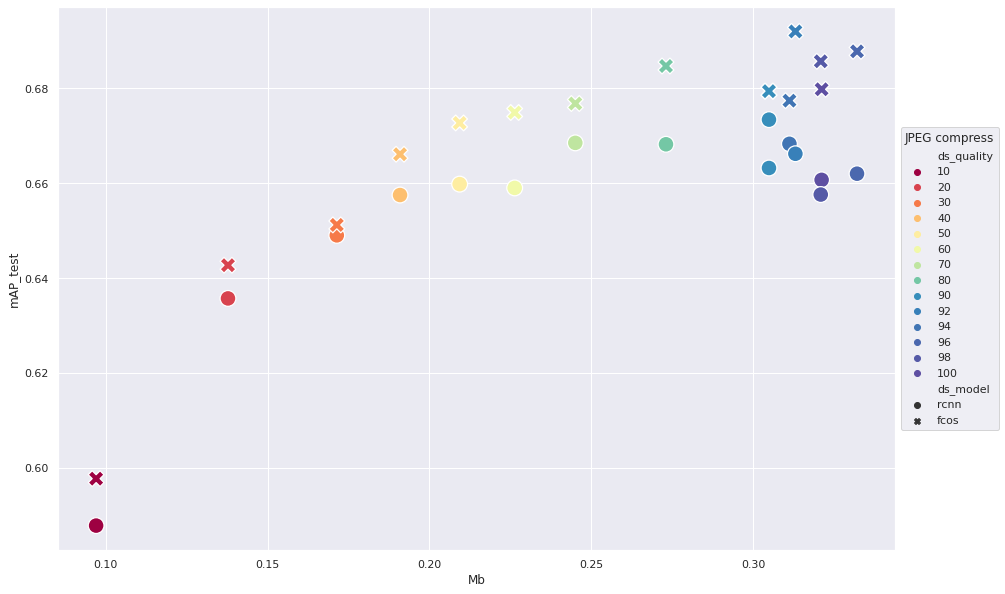

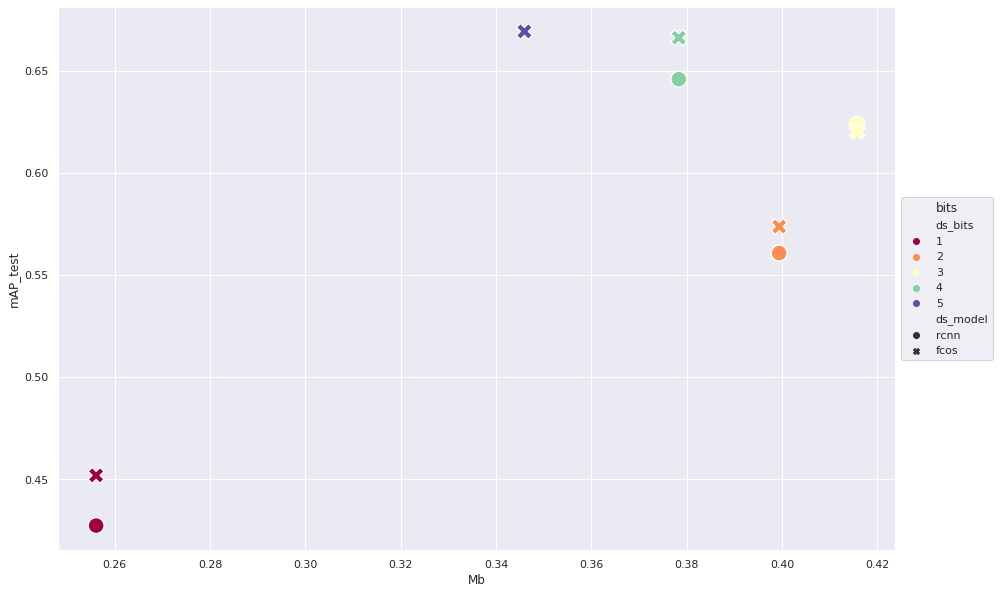

No handles with labels found to put in legend.


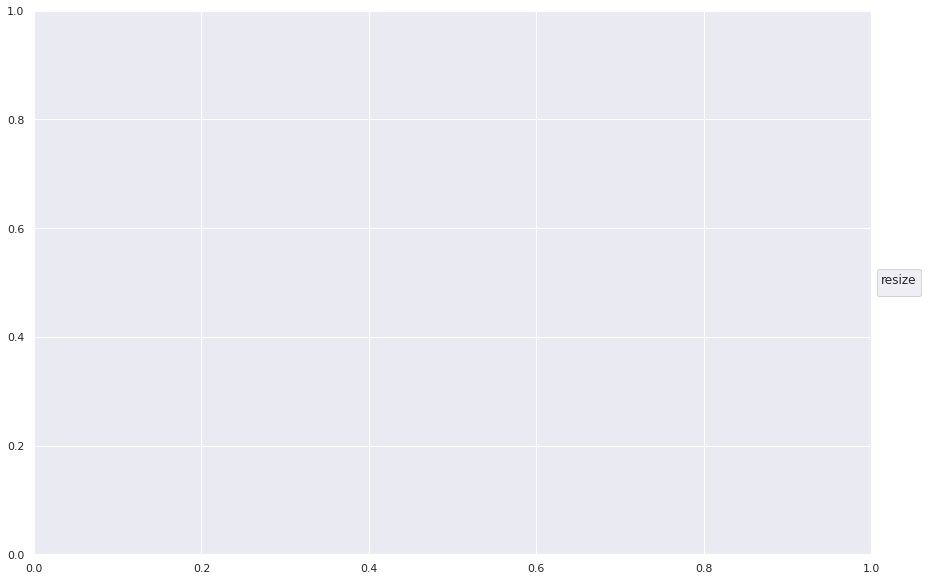

In [38]:
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)})

for title,mod,pal in zip(
    ['JPEG compress','bits','resize'],
    ['ds_quality','ds_bits','ds_scaleperc'],
    ['Reds','Greens','Blues']
    
):
    
    for dfq in [
        df[(df[mod].notnull()) & (df['ds_outformat']=='jpg')],
        # df[(df[mod].notnull()) & (df['ds_outformat']=='jpg') & (df['Mb']>0.16) & (df['mAP_test']>0.35) ]
    ]:
        
        dfq[mod] = dfq[mod].astype(int)

        handle = sns.scatterplot(
            data=dfq, x=met1, y=met2,
            hue=mod,
            legend='full',
            palette="Spectral",
            style=dfq['ds_model'],
            # alpha=0.5,
            # marker='X',
            s=250
        )

        leg =  handle.legend(title=title, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

        plt.show()